# Jeffrey Chen APHY 470 PSET 10
## Problem 1
### (a)

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
import math
import random
from scipy.optimize import curve_fit

In [2]:
df = pandas.read_csv("pset10_data.csv")

In [3]:
num_rows = df.shape[0]
df['low_exam'] = ' '
df['mid_exam'] = ' '
df['high_exam'] = ' '

for row in range(num_rows):
    test_scores = list(df.iloc[row][3:6])
    test_scores.sort()
    df.at[row, 'low_exam'] = test_scores[0]
    df.at[row, 'mid_exam'] = test_scores[1]
    df.at[row, 'high_exam'] = test_scores[2]
print(df.head(10))

low_exam_mean = numpy.average(df['low_exam'])
mid_exam_mean = numpy.average(df['mid_exam'])
high_exam_mean = numpy.average(df['high_exam'])

low_exam_sigma = numpy.std(df['low_exam'], ddof = 1)
mid_exam_sigma = numpy.std(df['mid_exam'], ddof = 1)
high_exam_sigma = numpy.std(df['high_exam'], ddof = 1)

print('{:<16} {:<16} {:<16}'.format('', 'Mean', 'Standard Dev'))
print('{:<16} {:<16.3f} {:<16.3f}'.format('Lowest exam', low_exam_mean, low_exam_sigma))
print('{:<16} {:<16.3f} {:<16.3f}'.format('Middle exam', mid_exam_mean, mid_exam_sigma))
print('{:<16} {:<16.3f} {:<16.3f}'.format('Highest exam', high_exam_mean, high_exam_sigma))

   quizzes  participation  psets  midterm1  midterm2  final  score low_exam  \
0     92.1          100.0   86.7      62.5        48   46.0   74.4       46   
1    100.0          100.0   98.3      55.0        62   54.0   79.6       54   
2    100.0          100.0   99.6      54.0        55   43.0   76.0       43   
3     84.2          100.0   94.3      48.0        63   44.0   74.7       44   
4     80.0            0.0   84.4      48.5        44   55.0   61.6       44   
5    100.0          100.0   99.1      64.0        79   65.0   87.9       64   
6     97.3          100.0   99.4      46.0        68   59.0   81.2       46   
7    100.0           94.6   97.3      59.0        72   56.0   82.6       56   
8    100.0          100.0   97.1      51.0        66   41.0   78.5       41   
9    100.0          100.0   99.6      93.0        98   91.0  102.0       91   

  mid_exam high_exam  
0       48      62.5  
1       55        62  
2       54        55  
3       48        63  
4     48.5     

### (b)

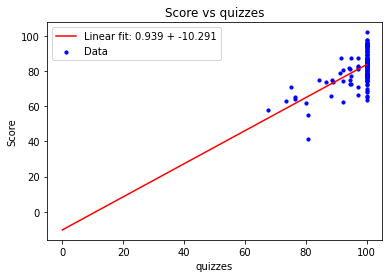

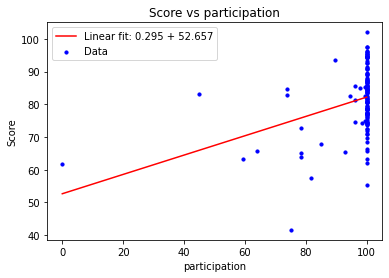

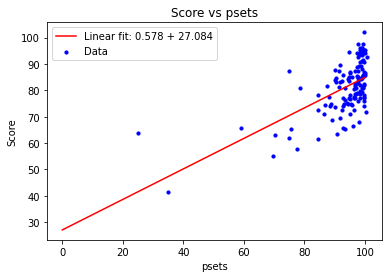

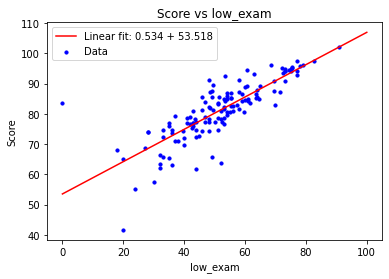

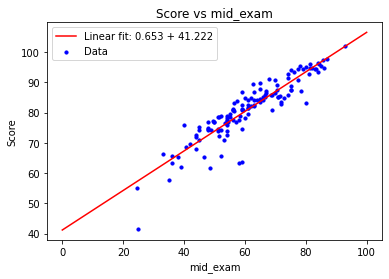

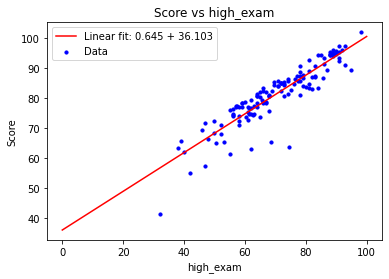

Predictor        Line of best fit         r           
quizzes          0.939x + -10.291         0.5906      
participation    0.295x + 52.657          0.3541      
psets            0.578x + 27.084          0.6111      
low_exam         0.534x + 53.518          0.8127      
mid_exam         0.653x + 41.222          0.9117      
high_exam        0.645x + 36.103          0.9059      


In [4]:
def linear_fit(x, m, b):
    return m * x + b

m_list = []
b_list = []
r_list = []

predictors = ['quizzes', 'participation', 'psets', 'low_exam', 'mid_exam', 'high_exam']
for predictor in predictors:
    opt, _ = curve_fit(linear_fit, df[predictor], df['score'])
    m, b = opt
    r = numpy.corrcoef(list(df[predictor]), list(df['score']))[0, 1]

    m_list.append(m)
    b_list.append(b)
    r_list.append(r)

    fit_x = numpy.linspace(0, 100, 500)
    fit_y = [linear_fit(x, m, b) for x in fit_x]

    plt.scatter(df[predictor], df['score'], color = "blue", s = 10, label = "Data")
    plt.plot(fit_x, fit_y, color = "red", label = f"Linear fit: {round(m, 3)} + {round(b, 3)}")
    plt.title(f"Score vs {predictor}")
    plt.xlabel(f"{predictor}")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

print("{:<16} {:<24} {:<12}".format("Predictor", "Line of best fit", "r"))
for i in range(len(predictors)):
    print("{:<16} {:<24} {:<12.4f}".format(predictors[i], f"{round(m_list[i], 3)}x + {round(b_list[i], 3)}", r_list[i]))

We can see that the exam scores have the highest explanatory power of score since they have the highest Pearson $r$ coefficients. The variable that is least helpful is participation. These findings make sense since in a STEM class, higher exams scores are often associated with greater understanding of the material and better scores in the class since exams are often worth a substantial chunk of the grade. However, the weakness of participation is a little surprising since I thought that greater participation is associated with greater engagement and thus better understanding of the material.

### (c)

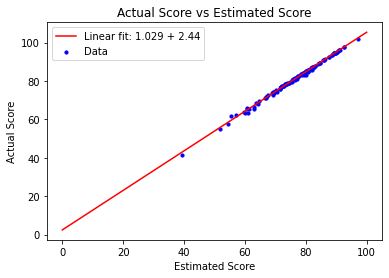

Predictor        Line of best fit         r           
Estimated Score  1.029x + 2.44            0.9985      


In [5]:
df['est_score'] = ' '
for row in range(num_rows):
    df.at[row, 'est_score'] = df.at[row, 'quizzes'] * .1 + df.at[row, 'participation'] * .1 + df.at[row,'psets'] * .2 + df.at[row, 'low_exam'] * .1 + df.at[row,'mid_exam'] * .2 + df.at[row, 'high_exam'] * .3

opt, _ = curve_fit(linear_fit, df['est_score'], df['score'])
m, b = opt
r = numpy.corrcoef(list(df['est_score']), list(df['score']))[0, 1]
fit_x = numpy.linspace(0, 100, 500)
fit_y = [linear_fit(x, m, b) for x in fit_x]

plt.scatter(df['est_score'], df['score'], color = "blue", s = 10, label = "Data")
plt.plot(fit_x, fit_y, color = "red", label = f"Linear fit: {round(m, 3)} + {round(b, 3)}")
plt.title(f"Actual Score vs Estimated Score")
plt.xlabel("Estimated Score")
plt.ylabel("Actual Score")
plt.legend()
plt.show()

print("{:<16} {:<24} {:<12}".format("Predictor", "Line of best fit", "r"))
print("{:<16} {:<24} {:<12.4f}".format("Estimated Score", f"{round(m, 3)}x + {round(b, 3)}", r))

### (d)

In [6]:
data = []
for row in range(num_rows):
    row_data = []
    for predictor in predictors:
        row_data.append(df.at[row, predictor])
    data.append(row_data)
# We use ddof = 1 for unbiased estimator
print(" ".join(predictors))
C = numpy.matrix(numpy.corrcoef(list(data), ddof = 1))
print(C)

quizzes participation psets low_exam mid_exam high_exam
[[1.         0.97856978 0.96685503 ... 0.96873035 0.96912561 0.98574244]
 [0.97856978 1.         0.9928156  ... 0.92626777 0.97378465 0.99739638]
 [0.96685503 0.9928156  1.         ... 0.91611417 0.98417877 0.98648539]
 ...
 [0.96873035 0.92626777 0.91611417 ... 1.         0.95749482 0.94743016]
 [0.96912561 0.97378465 0.98417877 ... 0.95749482 1.         0.9780549 ]
 [0.98574244 0.99739638 0.98648539 ... 0.94743016 0.9780549  1.        ]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: bias and ddof have no effect and are deprecated
  if __name__ == '__main__':


Note: the rows are ordered in the same way as the columns

### (d)